In [2]:
from importlib import reload
import time
import json
import loader
import kcenters
from utils import balance, plot_analysis
from experiments import run_experiments

import matplotlib.pyplot as plt
%matplotlib inline

## Data Load

In [3]:
source = "bank"
normalize = False
degrees = 20

with open('config.json', encoding='utf8') as json_file:
    config = json.load(json_file)
    loader.load(config)
    blues, reds, data_list, dist_threshold = loader.sample()


Encoding married as 1, and single as 0



#### Unfair k-Centers on the dataset

Time taken for Degree 3 - 0.109 seconds.
Time taken for Degree 4 - 0.140 seconds.
Time taken for Degree 5 - 0.197 seconds.
Time taken for Degree 6 - 0.272 seconds.
Time taken for Degree 7 - 0.377 seconds.
Time taken for Degree 8 - 0.428 seconds.
Time taken for Degree 9 - 0.489 seconds.
Time taken for Degree 10 - 0.705 seconds.
Time taken for Degree 11 - 0.702 seconds.
Time taken for Degree 12 - 0.944 seconds.
Time taken for Degree 13 - 1.040 seconds.
Time taken for Degree 14 - 0.963 seconds.
Time taken for Degree 15 - 0.850 seconds.
Time taken for Degree 16 - 0.910 seconds.
Time taken for Degree 17 - 0.989 seconds.
Time taken for Degree 18 - 1.049 seconds.
Time taken for Degree 19 - 1.183 seconds.
Time taken for Degree 20 - 1.220 seconds.


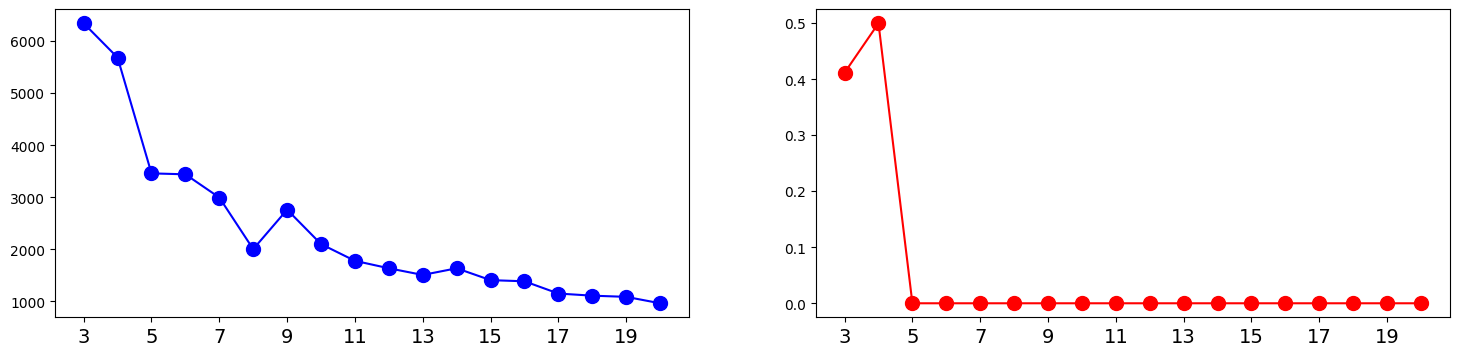

In [5]:
unfair_degrees = []
unfair_costs = []
unfair_balances = []

for degree in range(3, degrees+1, 1):
    start_time = time.time()
    centers, cost = kcenters.kcenter(data_list, degree)
    mapping = kcenters.p2c()
    unfair_degrees.append(degree)
    unfair_costs.append(cost)
    unfair_balances.append(balance(data_list, centers, mapping))
    print("Time for # Cluster %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(unfair_degrees, unfair_costs, unfair_balances, step_size=2)

### Vanilla Fairlet Decomposition

Time taken for Degree 1 - 0.022 seconds.
Time taken for Degree 2 - 0.053 seconds.
Time taken for Degree 3 - 0.071 seconds.
Time taken for Degree 4 - 0.086 seconds.
Time taken for Degree 5 - 0.121 seconds.
Time taken for Degree 6 - 0.162 seconds.
Time taken for Degree 7 - 0.188 seconds.
Time taken for Degree 8 - 0.228 seconds.
Time taken for Degree 9 - 0.262 seconds.
Time taken for Degree 10 - 0.267 seconds.
Time taken for Degree 11 - 0.378 seconds.
Time taken for Degree 12 - 0.375 seconds.
Time taken for Degree 13 - 0.464 seconds.
Time taken for Degree 14 - 0.591 seconds.
Time taken for Degree 15 - 0.625 seconds.
Time taken for Degree 16 - 0.635 seconds.
Time taken for Degree 17 - 0.762 seconds.
Time taken for Degree 18 - 0.814 seconds.
Time taken for Degree 19 - 0.620 seconds.
Time taken for Degree 20 - 0.629 seconds.


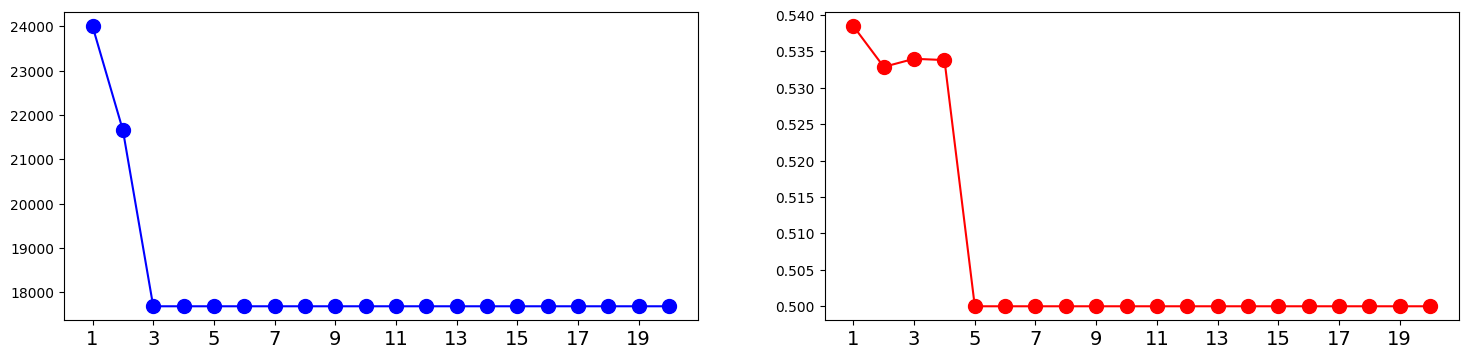

In [6]:
from valinna_fairlet import init_valinna,decompose
init_valinna(data_list, 1, 2, blues, reds)

vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = decompose()
vanilla_degrees, vanilla_costs, vanilla_balances = run_experiments(degrees, data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

### MCF Fairlet Decomposition

In [7]:
from mcf_fairlet import init, gen_dist, gen_graph, gen_fairlet, gen_misc
init(data_list, blues, reds, 2, dist_threshold)
gen_dist()
gen_graph()
fairlets = gen_fairlet()
print('fairlets complete')
mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = gen_misc(fairlets)

fairlets complete


## Final Comparison Plot

Time taken for Degree 1 - 0.019 seconds.
Time taken for Degree 2 - 0.032 seconds.
Time taken for Degree 3 - 0.063 seconds.
Time taken for Degree 4 - 0.091 seconds.
Time taken for Degree 5 - 0.126 seconds.
Time taken for Degree 6 - 0.128 seconds.
Time taken for Degree 7 - 0.176 seconds.
Time taken for Degree 8 - 0.235 seconds.
Time taken for Degree 9 - 0.284 seconds.
Time taken for Degree 10 - 0.345 seconds.
Time taken for Degree 11 - 0.392 seconds.
Time taken for Degree 12 - 0.449 seconds.
Time taken for Degree 13 - 0.494 seconds.
Time taken for Degree 14 - 0.530 seconds.
Time taken for Degree 15 - 0.632 seconds.
Time taken for Degree 16 - 0.717 seconds.
Time taken for Degree 17 - 0.752 seconds.
Time taken for Degree 18 - 0.813 seconds.
Time taken for Degree 19 - 0.864 seconds.
Time taken for Degree 20 - 0.827 seconds.


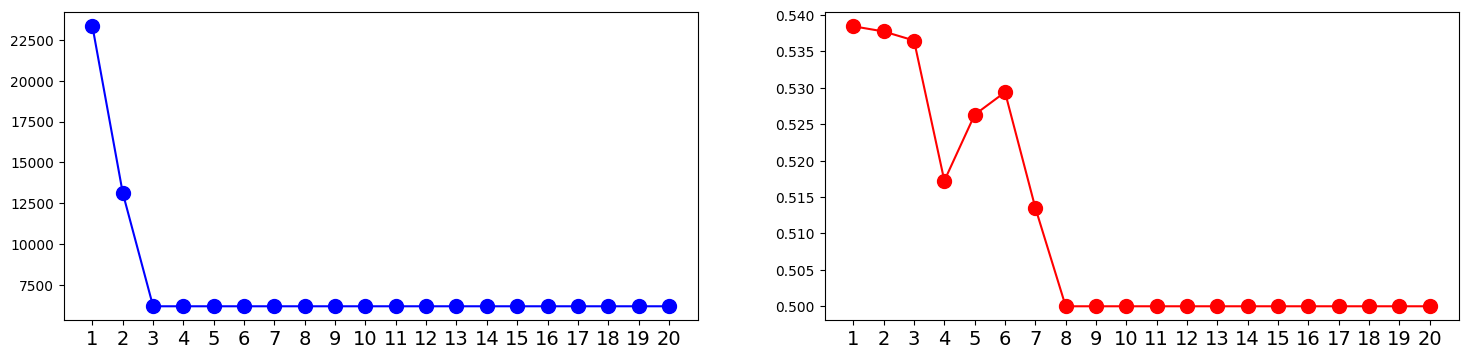

In [8]:
mcf_degrees, mcf_costs, mcf_balances = run_experiments(degrees, data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=1)

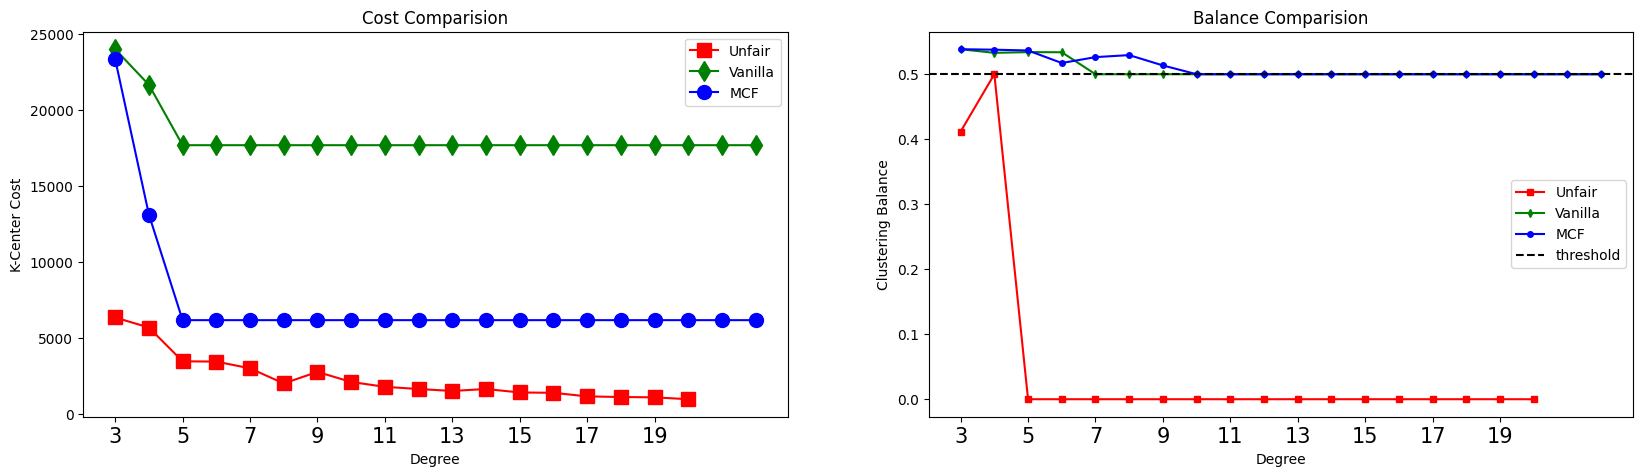

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].plot(unfair_costs, marker='s', markersize=10, color='brown', label="Unfair")
ax[0].plot(vanilla_costs, marker='d',markersize=10, color='blue', label="Vanilla")
ax[0].plot(mcf_costs, marker='o',markersize=10, color='green', label="MCF")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 2))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 2)), fontsize=15)
ax[0].set_title("Cost Comparision")
ax[0].set_xlabel("# Cluster")
ax[0].set_ylabel("K-Center Cost")
ax[0].legend()
ax[1].plot(unfair_balances, marker='s', markersize=4, color='brown', label="Unfair")
ax[1].plot(vanilla_balances, marker='d', markersize=4, color='blue', label="Vanilla")
ax[1].plot(mcf_balances, marker='o', markersize=4, color='green', label="MCF")
ax[1].axhline(0.5, color='black', linestyle='--', label="threshold")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 2))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 2)), fontsize=15)
ax[1].set_title("Balance Comparision")
ax[1].set_xlabel("# Cluster")
ax[1].set_ylabel("Clustering Balance")
ax[1].legend()
plt.show()